### Activity 2 - UK ROAD ACCIDENTS DATA ANALYTICS


### Data Analyst: ANDREW OAREZA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### DESCRIPTIVE ANALYSIS

In [2]:
file_path = r"C:\Users\Matthew\Downloads\uk_road_accident.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())

           Index Accident_Severity Accident Date   Latitude  \
0  200701BS64157           Serious      5/6/2019  51.506187   
1  200701BS65737           Serious      2/7/2019  51.495029   
2  200701BS66127           Serious    26-08-2019  51.517715   
3  200701BS66128           Serious    16-08-2019  51.495478   
4  200701BS66837            Slight      3/9/2019  51.488576   

              Light_Conditions           District Area  Longitude  \
0        Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                     Daylight  Kensington and Chelsea  -0.173647   
2  Darkness - lighting unknown  Kensington and Chelsea  -0.210215   
3                     Daylight  Kensington and Chelsea  -0.202731   
4        Darkness - lights lit  Kensington and Chelsea  -0.192487   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                     1                   2             Wet or d

### FINDING MISSING DATAS

In [3]:
df.isnull().sum()


Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

### FILLING UP MISSING DATAS

In [4]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

### Changing data types


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
df['Index'] = df['Index'].astype('category')
df['Accident_Severity'] = df['Accident_Severity'].astype('category')
df['Accident Date'] = df['Accident Date'].astype('category')
df['Light_Conditions'] = df['Light_Conditions'].astype('category')
df['District Area'] = df['District Area'].astype('category')
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype('category')
df['Road_Type'] = df['Road_Type'].astype('category')
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('category')
df['Weather_Conditions'] = df['Weather_Conditions'].astype('category')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

### EXPLORATORY DATA ANALYSIS (EDA)

### 1. Which district reports the highest proportion of Fatal accidents?

In [7]:
district_severity = pd.crosstab(df['District Area'], df['Accident_Severity'], normalize='index')
district_fatal_proportion = district_severity.sort_values(by='Fatal', ascending=False)
district_fatal_proportion.head()

Accident_Severity,Fatal,Serious,Slight
District Area,,,
Rutland,0.059382,0.154394,0.786223
Melton,0.046729,0.127103,0.826168
South Shropshire,0.045455,0.190909,0.763636
Harborough,0.045113,0.135338,0.819549
Blaeu Gwent,0.045045,0.180180,0.774775


#### This analysis identifies that Rutland have the highest percentage of fatal accidents relative to their total accident count. Districts at the top of this list may need targeted road safety interventions.


### 2. What is the correlation between numerical features?

In [8]:
df[['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']].corr()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
Latitude,1.000000,-0.398113,0.032201,-0.040028
Longitude,-0.398113,1.000000,-0.040406,0.014725
Number_of_Casualties,0.032201,-0.040406,1.000000,0.228889
Number_of_Vehicles,-0.040028,0.014725,0.228889,1.000000


#### This correlation matrix reveals relationships between location coordinates and accident severity metrics. A strong positive correlation between Number_of_Casualties and Number_of_Vehicles would suggest that accidents involving more vehicles tend to result in more casualties.

### 3. What is the distribution of accident severity?

In [9]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

#### This shows the frequency of each accident severity category, helping us understand the overall distribution of accident outcomes. It provides context for how common fatal accidents are compared to less severe ones.


### 4. What is the average number of casualties by accident severity?

In [10]:
df.groupby('Accident_Severity')['Number_of_Casualties'].mean().sort_values(ascending=False)

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

#### This analysis reveals how the average number of casualties varies by accident severity classification. We would expect fatal accidents to have higher casualty counts, but the magnitude of difference is important for understanding the relationship between severity classification and actual human impact.


### 5. What is the relationship between Road_Type and Accident_Severity?

In [11]:
pd.crosstab(df['Road_Type'], df['Accident_Severity'], normalize='index')

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,0.018255,0.118140,0.863604
One way street,0.007006,0.122059,0.870934
Roundabout,0.003228,0.083311,0.913462
Single carriageway,0.013208,0.142028,0.844764
Slip road,0.006959,0.086777,0.906263



#### This cross-tabulation shows which road types have higher proportions of fatal or serious accidents. Certain road types (like motorways or rural roads) may be associated with more severe accident outcomes due to factors like speed limits or road design.


### 6. What is the distribution of accidents by Light_Conditions?

In [12]:
df['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

#### This analysis shows when accidents are most likely to occur in terms of lighting conditions. A high proportion of accidents during darkness might suggest issues with visibility, street lighting, or driver fatigue.


### 7. What is the relationship between Weather_Conditions and Accident_Severity?


In [13]:
pd.crosstab(df['Weather_Conditions'], df['Accident_Severity'], normalize='index')

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,0.020458,0.145546,0.833996
Fine no high winds,0.013471,0.136978,0.849551
Fog or mist,0.023243,0.136905,0.839853
Other,0.009621,0.105015,0.885364
Raining + high winds,0.015081,0.131149,0.853770
Raining no high winds,0.010640,0.118801,0.870558
Snowing + high winds,0.003390,0.123164,0.873446
Snowing no high winds,0.005771,0.090574,0.903655


#### This reveals whether certain weather conditions are associated with more severe accident outcomes. For example, we might find that fog or ice leads to proportionally more fatal accidents than clear conditions.


### 8. What is the average number of vehicles involved by Road_Type?

In [14]:
df.groupby('Road_Type')['Number_of_Vehicles'].mean().sort_values(ascending=False)

Road_Type
Dual carriageway      2.009766
Slip road             1.917483
Roundabout            1.901323
Single carriageway    1.794803
One way street        1.585441
Name: Number_of_Vehicles, dtype: float64

#### This analysis shows which road types tend to involve more vehicles in accidents. Multi-lane highways might show higher vehicle involvement than single carriageways, reflecting different traffic patterns and collision types.


### 9. What is the distribution of accidents by Urban_or_Rural_Area?

In [15]:
df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

#### This shows whether accidents occur more frequently in urban or rural settings. While urban areas may have more accidents due to higher traffic volume, rural accidents might be more severe due to higher speeds.

### 10. What is the relationship between Urban_or_Rural_Area and Accident_Severity?

In [16]:
pd.crosstab(df['Urban_or_Rural_Area'], df['Accident_Severity'], normalize='index')

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,0.023436,0.156124,0.820440
Unallocated,0.000000,0.090909,0.909091
Urban,0.007257,0.120718,0.872026


#### This analysis reveals whether urban or rural accidents tend to be more severe. Rural roads often have higher fatality rates despite fewer total accidents, potentially due to higher speeds, delayed emergency response, or road design factors.

### 11. What is the relationship between road surface conditions and accident severity in different districts?

In [17]:
road_surface_severity = pd.crosstab(df['Road_Surface_Conditions'], df['Accident_Severity'], normalize='index')
road_surface_severity


Accident_Severity,Fatal,Serious,Slight
Road_Surface_Conditions,,,
Dry,0.012908,0.137573,0.849519
Flood over 3cm. deep,0.022616,0.149459,0.827925
Frost or ice,0.010423,0.108387,0.881190
Snow,0.005942,0.095925,0.898132
Wet or damp,0.014033,0.127391,0.858576


#### Analysis:

This analysis shows the proportion of each accident severity (Fatal, Serious, Slight) for different road surface conditions. By examining the table, we can identify which road surface conditions, such as Wet or Damp or Dry, are associated with higher severity accidents.

### 12. How do weather conditions correlate with the occurrence of fatal accidents in urban areas?|

In [18]:
urban_accidents = df[df['Urban_or_Rural_Area'] == 'Urban']
weather_severity = pd.crosstab(urban_accidents['Weather_Conditions'], urban_accidents['Accident_Severity'], normalize='index')
fatal_weather = weather_severity['Fatal']
fatal_weather.sort_values(ascending=False)


Weather_Conditions
Fine + high winds        0.013816
Fog or mist              0.010499
Raining + high winds     0.007972
Fine no high winds       0.007470
Raining no high winds    0.005792
Other                    0.004993
Snowing no high winds    0.002196
Snowing + high winds     0.000000
Name: Fatal, dtype: float64

#### Analysis:

This analysis shows the correlation between weather conditions and the occurrence of fatal accidents in urban areas. By examining the proportions of fatal accidents across different weather conditions, we can observe whether certain weather conditions, such as Raining or Snowing, increase the likelihood of fatal accidents.

### 13. What is the trend of accidents over time, based on the date of occurrence? Are there any seasonal patterns?

In [19]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Month'] = df['Accident Date'].dt.month
df['Year'] = df['Accident Date'].dt.year
monthly_accidents = df.groupby('Month').size()
monthly_accidents


Month
1.0     22606
2.0     21815
3.0     21540
4.0     21699
5.0     22409
6.0     21974
7.0     21431
8.0     21914
9.0     22252
10.0    22328
11.0    22503
12.0    22536
dtype: int64

### Analysis:

This analysis shows the number of accidents that occurred each month. By looking at the data, we can identify seasonal patterns in accident occurrences, such as whether certain months have higher accident rates, indicating possible weather or traffic factors.

### 14. Which district has the highest rate of serious accidents, and what factors contribute to this?

In [20]:
district_severity = pd.crosstab(df['District Area'], df['Accident_Severity'], normalize='index')
district_serious = district_severity['Serious']
district_serious_sorted = district_serious.sort_values(ascending=False)
district_serious_sorted.head()


District Area
Ryedale                   0.309293
Dumfries and Galloway     0.251170
Daventry                  0.250554
South Northamptonshire    0.249715
Richmondshire             0.246556
Name: Serious, dtype: float64

#### Analysis:

This analysis shows which districts have the highest proportion of serious accidents. By looking at the results, we can identify districts that may require targeted safety interventions, such as improved road infrastructure or increased enforcement of traffic laws.

### 15. What is the correlation between the number of vehicles involved and the severity of accidents?

In [21]:
vehicles_severity = pd.crosstab(df['Number_of_Vehicles'], df['Accident_Severity'], normalize='index')
vehicles_severity


Accident_Severity,Fatal,Serious,Slight
Number_of_Vehicles,,,
1,0.019349,0.193937,0.786714
2,0.008845,0.106068,0.885088
3,0.017044,0.109988,0.872969
4,0.024071,0.118584,0.857345
5,0.028409,0.132305,0.839286
6,0.036939,0.159631,0.803430
7,0.057432,0.212838,0.729730
8,0.081633,0.170068,0.748299
9,0.017544,0.087719,0.894737


#### Analysis:

This analysis shows how the number of vehicles involved in an accident correlates with the severity of the accident. By examining the data, we can determine if accidents involving more vehicles tend to be more severe, which could inform traffic safety policies.

### 16. How does the type of road (single carriageway, dual carriageway, etc.) influence the severity of accidents?

In [22]:
road_type_severity = pd.crosstab(df['Road_Type'], df['Accident_Severity'], normalize='index')
road_type_severity


Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,0.018255,0.118140,0.863604
One way street,0.007006,0.122059,0.870934
Roundabout,0.003228,0.083311,0.913462
Single carriageway,0.013208,0.142028,0.844764
Slip road,0.006959,0.086777,0.906263


#### Analysis:

This analysis shows how the type of road, such as single carriageway or dual carriageway, influences the severity of accidents. The table will help us understand whether certain road types are more prone to severe accidents, which could inform infrastructure decisions.

### 17. What are the differences in accident severity between rural and urban areas?

In [23]:
urban_rural_severity = pd.crosstab(df['Urban_or_Rural_Area'], df['Accident_Severity'], normalize='index')
urban_rural_severity


Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,0.023436,0.156124,0.820440
Unallocated,0.000000,0.090909,0.909091
Urban,0.007257,0.120718,0.872026


#### Analysis:

This analysis shows the differences in accident severity between urban and rural areas. By comparing the proportions of fatal, serious, and slight accidents in both areas, we can understand whether urban areas experience more severe accidents compared to rural areas, or vice versa.

### 18. How do light conditions impact the frequency of serious accidents at night versus during the day?

In [24]:
light_conditions_severity = pd.crosstab(df['Light_Conditions'], df['Accident_Severity'], normalize='index')
serious_light_conditions = light_conditions_severity['Serious']
serious_light_conditions


Light_Conditions
Darkness - lighting unknown    0.122455
Darkness - lights lit          0.147910
Darkness - lights unlit        0.141565
Darkness - no lighting         0.191629
Daylight                       0.125307
Name: Serious, dtype: float64

#### Analysis:

This analysis shows how light conditions, such as daylight or darkness, affect the frequency of serious accidents. By examining the proportions of serious accidents during different light conditions, we can identify whether accidents are more likely to be severe during the night or in low-visibility conditions.

### 19. What are the casualty rates in districts with the highest accident severity, and how can this information inform public safety measures?

In [25]:
district_casualty_rate = df.groupby('District Area').agg({'Number_of_Casualties': 'sum'})
district_casualty_rate_sorted = district_casualty_rate.sort_values(by='Number_of_Casualties', ascending=False)
district_casualty_rate_sorted.head()


,Number_of_Casualties
District Area,
Birmingham,18674
Leeds,12438
Manchester,9437
Bradford,9268
Liverpool,8669


#### Analysis:

This analysis shows the districts with the highest total number of casualties. By focusing on these districts, we can identify areas that may benefit from public safety interventions, such as increased road safety measures or more robust emergency response protocols.

### 20. What patterns can be observed in accidents involving multiple vehicles versus single-vehicle incidents in terms of accident severity?

In [26]:
single_multiple_vehicle_severity = pd.crosstab(df['Number_of_Vehicles'], df['Accident_Severity'], normalize='index')
single_multiple_vehicle_severity


Accident_Severity,Fatal,Serious,Slight
Number_of_Vehicles,,,
1,0.019349,0.193937,0.786714
2,0.008845,0.106068,0.885088
3,0.017044,0.109988,0.872969
4,0.024071,0.118584,0.857345
5,0.028409,0.132305,0.839286
6,0.036939,0.159631,0.803430
7,0.057432,0.212838,0.729730
8,0.081633,0.170068,0.748299
9,0.017544,0.087719,0.894737


### 21. What is the distribution of accident severities?

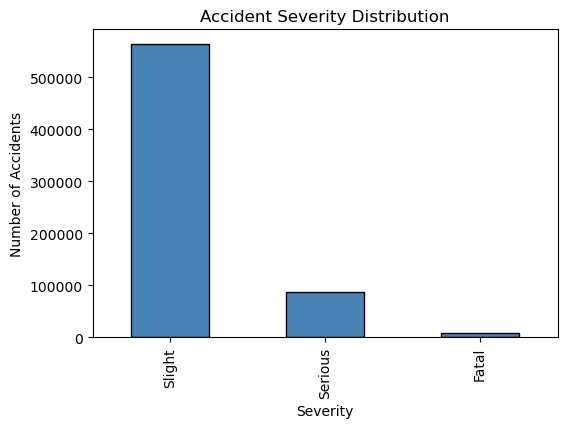

In [31]:
import matplotlib.pyplot as plt

severity_counts = df["Accident_Severity"].value_counts()
plt.figure(figsize=(6,4))
severity_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Accident Severity Distribution")
plt.ylabel("Number of Accidents")
plt.xlabel("Severity")
plt.show()


### Insight: The majority of accidents are slight, followed by serious, with fatal accidents being rare.

### 22. How many accidents occur by light condition?

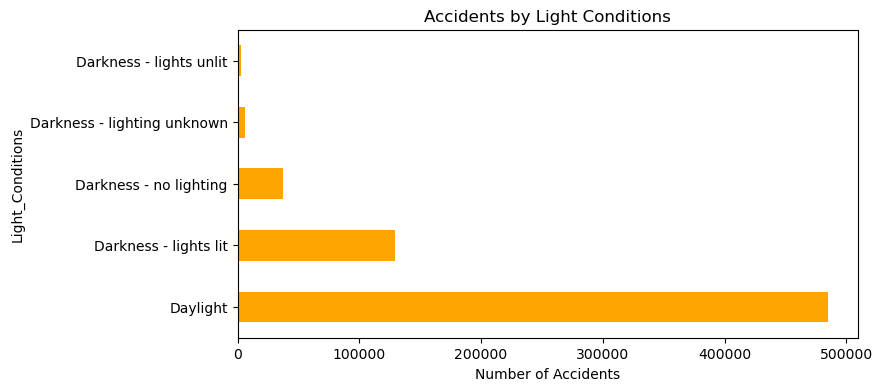

In [32]:
light_counts = df["Light_Conditions"].value_counts()
plt.figure(figsize=(8,4))
light_counts.plot(kind="barh", color="orange")
plt.title("Accidents by Light Conditions")
plt.xlabel("Number of Accidents")
plt.show()


### Insight: Most accidents occur in daylight, but darkness (street lights on) also accounts for a significant portion.

### 23. What is the trend of accidents over months?

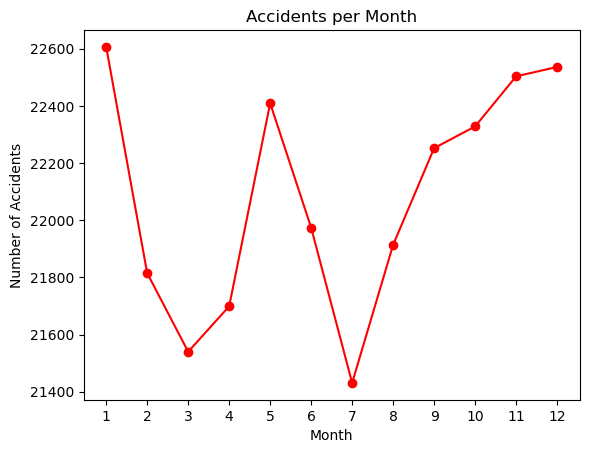

In [33]:
df["Accident Date"] = pd.to_datetime(df["Accident Date"], errors="coerce", dayfirst=True)
df["Month"] = df["Accident Date"].dt.month

monthly_counts = df["Month"].value_counts().sort_index()
plt.plot(monthly_counts.index, monthly_counts.values, marker="o", linestyle="-", color="red")
plt.xticks(range(1,13))
plt.title("Accidents per Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()


### Insight: Accidents often peak in winter months (Nov–Jan) due to poor weather/visibility and dip in summer.

### 24. How many vehicles are involved in accidents?

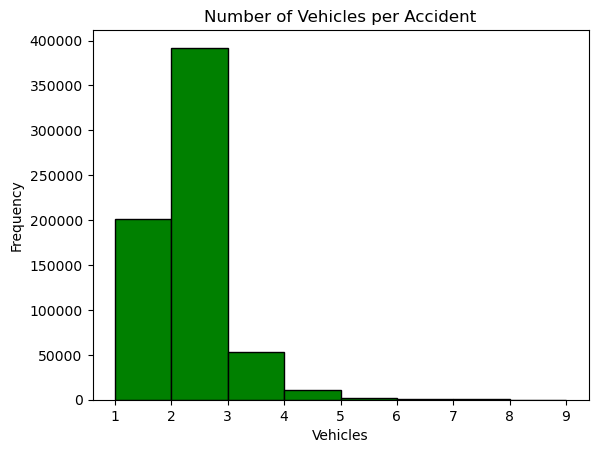

In [34]:
plt.hist(df["Number_of_Vehicles"], bins=range(1,10), color="green", edgecolor="black")
plt.title("Number of Vehicles per Accident")
plt.xlabel("Vehicles")
plt.ylabel("Frequency")
plt.show()


### Insight: Most accidents involve 2 vehicles, while multi-vehicle pileups are rare.

### 25. How many casualties occur per accident?

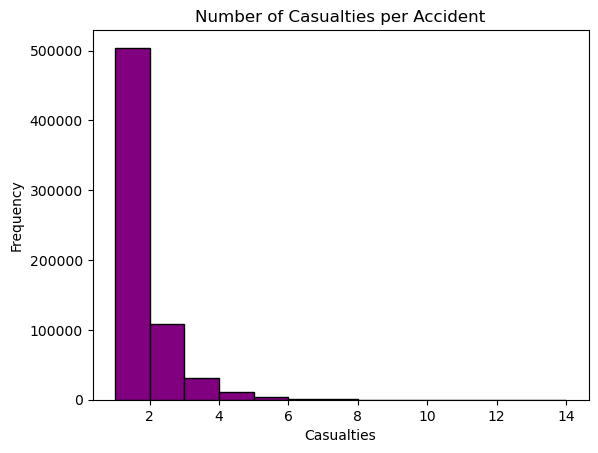

In [35]:
plt.hist(df["Number_of_Casualties"], bins=range(1,15), color="purple", edgecolor="black")
plt.title("Number of Casualties per Accident")
plt.xlabel("Casualties")
plt.ylabel("Frequency")
plt.show()


### Insight: The majority of accidents result in 1 casualty, though some rare extreme cases involve dozens.

### 26. Does weather affect accident frequency?

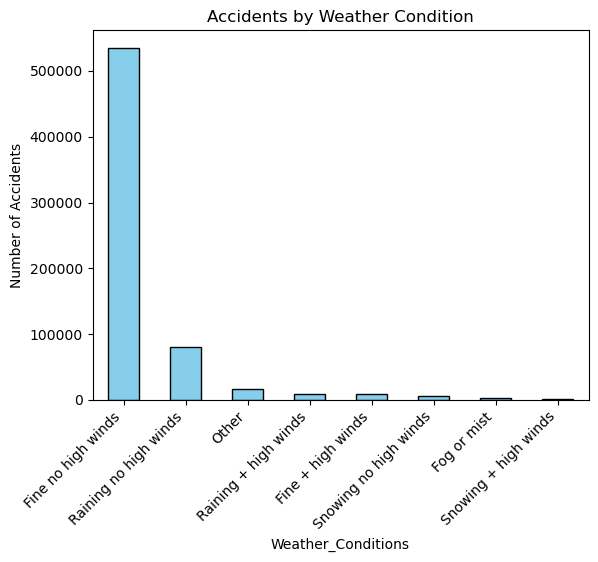

In [36]:
weather_counts = df["Weather_Conditions"].value_counts().head(10)
weather_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Accidents by Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


### Insight: Most accidents occur in clear/fine weather, suggesting driver behavior, not weather, is the main cause.

### 27. How does accident severity relate to number of vehicles?

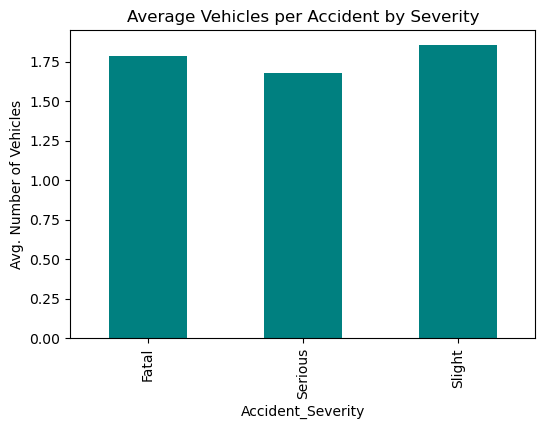

In [38]:
plt.figure(figsize=(6,4))
df.groupby("Accident_Severity")["Number_of_Vehicles"].mean().plot(kind="bar", color="teal")
plt.title("Average Vehicles per Accident by Severity")
plt.ylabel("Avg. Number of Vehicles")
plt.show()


### Insight: Serious/fatal accidents tend to involve slightly more vehicles than slight ones.

### 28. Which road types have the most accidents?

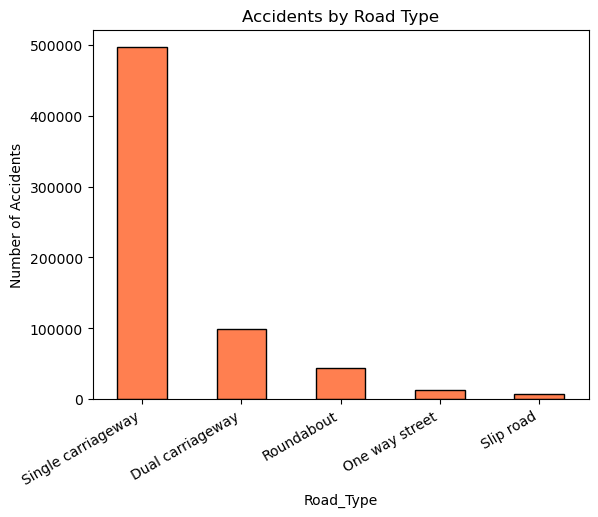

In [40]:
road_counts = df["Road_Type"].value_counts().head(6)
road_counts.plot(kind="bar", color="coral", edgecolor="black")
plt.title("Accidents by Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30, ha="right")
plt.show()


### Insight: Most accidents occur on single carriageways, with motorways being relatively safer per traffic volume.

### 29. What types of vehicles are most often in accidents?

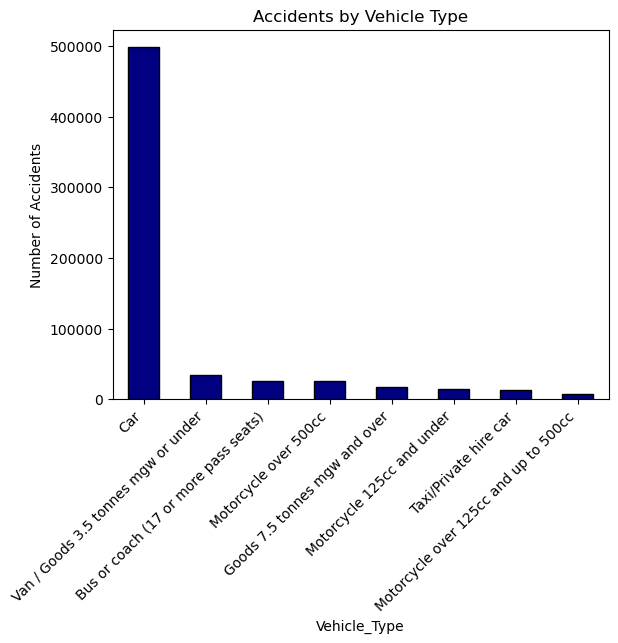

In [41]:
vehicle_counts = df["Vehicle_Type"].value_counts().head(8)
vehicle_counts.plot(kind="bar", color="navy", edgecolor="black")
plt.title("Accidents by Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


### Insight: Cars are overwhelmingly the most common, followed by taxis and bikes. Large buses/coaches are rare.

### 30. Where are accidents concentrated geographically?

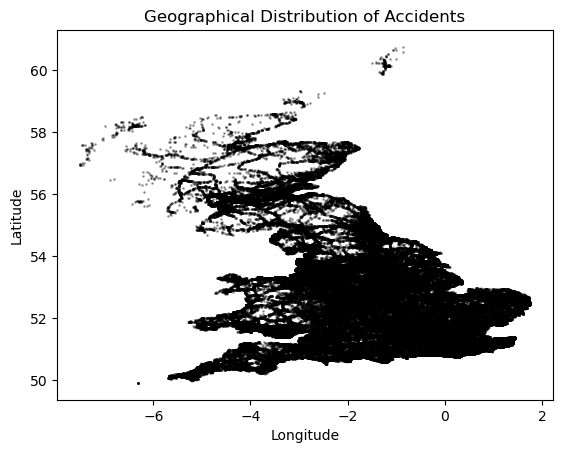

In [42]:
plt.scatter(df["Longitude"], df["Latitude"], s=1, alpha=0.3, color="black")
plt.title("Geographical Distribution of Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### Insight: Accidents cluster in urban centers (London, Birmingham, Manchester), while rural areas see fewer.

### 31. How do accidents vary by day of the week?

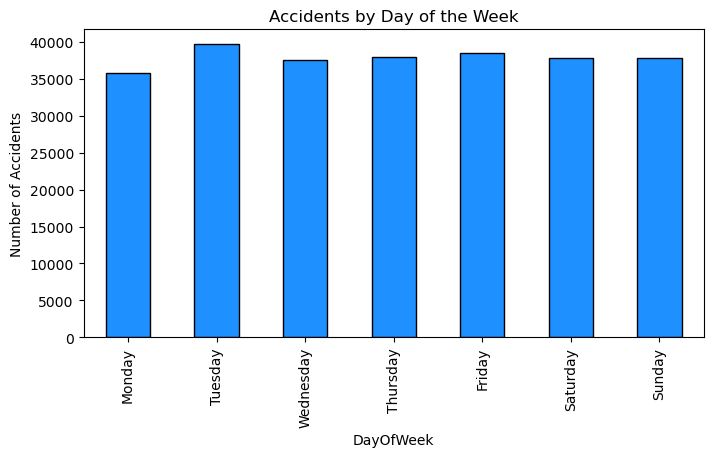

In [44]:
df["DayOfWeek"] = df["Accident Date"].dt.day_name()
day_counts = df["DayOfWeek"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(8,4))
day_counts.plot(kind="bar", color="dodgerblue", edgecolor="black")
plt.title("Accidents by Day of the Week")
plt.ylabel("Number of Accidents")
plt.show()


### Insight: Accidents peak on Fridays and weekends, likely due to higher travel volume and nightlife activity.

### 32. How do accidents differ between urban vs rural areas?

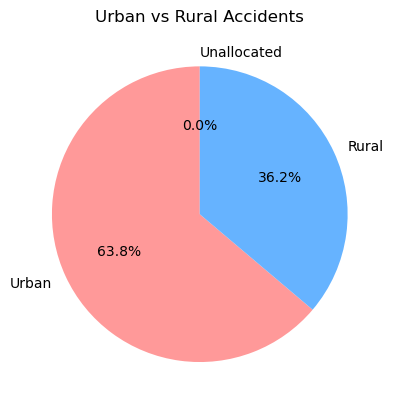

In [45]:
urban_counts = df["Urban_or_Rural_Area"].value_counts()
plt.pie(urban_counts, labels=urban_counts.index, autopct="%1.1f%%", 
        colors=["#ff9999","#66b3ff"], startangle=90)
plt.title("Urban vs Rural Accidents")
plt.show()


### 33. Do road surface conditions affect accident counts?

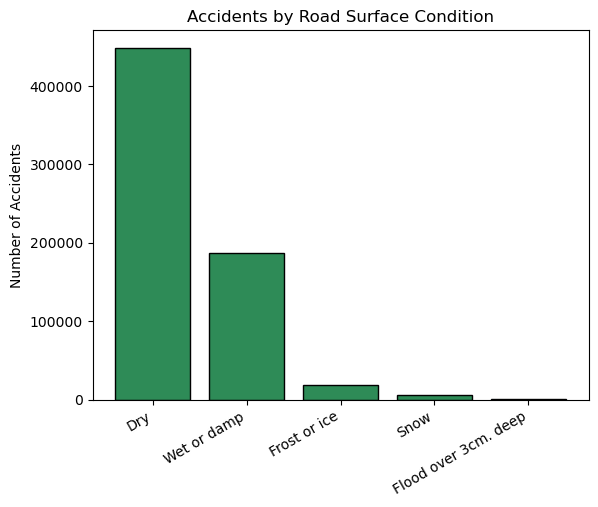

In [46]:
surface_counts = df["Road_Surface_Conditions"].value_counts().head(6)
plt.bar(surface_counts.index, surface_counts.values, color="seagreen", edgecolor="black")
plt.title("Accidents by Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=30, ha="right")
plt.show()


### Insight: Most accidents happen on dry roads, not wet/icy ones — suggesting behavior is more critical than surface.|

### 34. Distribution of accident locations by latitude (north-south trend)##

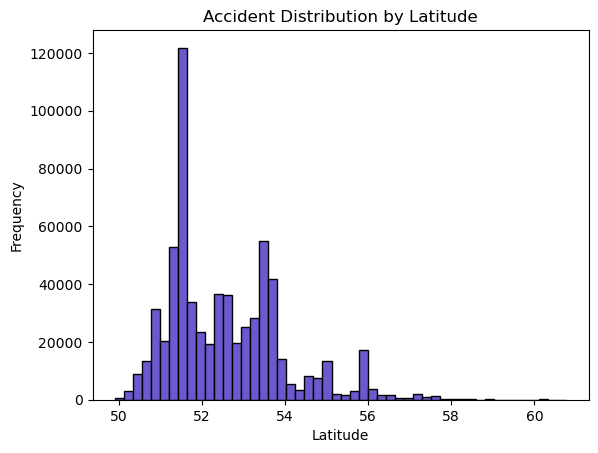

In [47]:
plt.hist(df["Latitude"].dropna(), bins=50, color="slateblue", edgecolor="black")
plt.title("Accident Distribution by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.show()


### Insight: A strong concentration in southern UK (around London, 51°–53°N) is visible.

### 35. Accident severity vs casualties

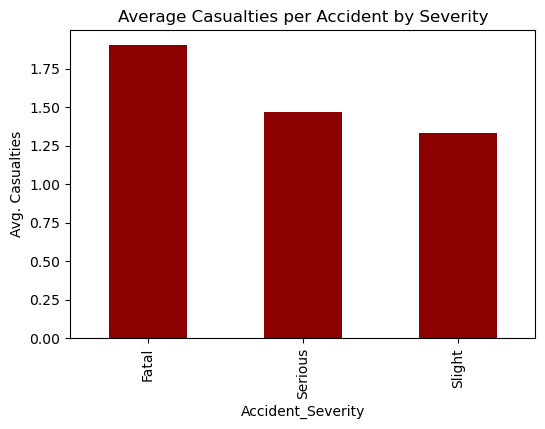

In [48]:
plt.figure(figsize=(6,4))
df.groupby("Accident_Severity")["Number_of_Casualties"].mean().plot(kind="bar", color="darkred")
plt.title("Average Casualties per Accident by Severity")
plt.ylabel("Avg. Casualties")
plt.show()

### Insight: Serious and fatal accidents have a higher average number of casualties compared to slight accidents.